In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
data = '../datasets/'
train = 'train.csv'
test = 'test.csv'

In [3]:
train_df = pd.read_csv(data+train)
test_df = pd.read_csv(data+test)

In [4]:
train_df.shape

(2051, 81)

In [5]:
test_df.shape

(878, 80)

In [6]:
train_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
test_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [8]:
train_df['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [9]:
test_df['Garage Type'].value_counts()

Attchd     518
Detchd     246
BuiltIn     53
Basment      9
CarPort      4
2Types       4
Name: Garage Type, dtype: int64

In [10]:
n = train_df['SalePrice'].mean()
test_price = n*np.ones_like(test_df['Id'])

In [11]:
n

181469.70160897123

In [12]:
test_df['SalePrice'] = test_price

In [13]:
test_df.shape

(878, 81)

In [16]:
test_df.drop(columns = 'SalePrice', inplace = True)


In [17]:
test_df.shape

(878, 80)

In [ ]:
# .copy() helps avoid error "attempting to set a value on a slice"

submission = test_df[['Id','SalePrice']].copy() 

In [ ]:
submission.head()

In [ ]:
train_df['baseline'] = train_df['SalePrice'].mean()

In [ ]:
train_df.head()

In [ ]:
np.sqrt(mean_squared_error(train_df['SalePrice'],train_df['baseline']))

In [ ]:
submission.head()

In [ ]:
submission.to_csv(data+'submissions/sub_1.csv', index = False)

In [ ]:
test_price2 = 1 * train_df['SalePrice'].mean()

In [ ]:
test_price2

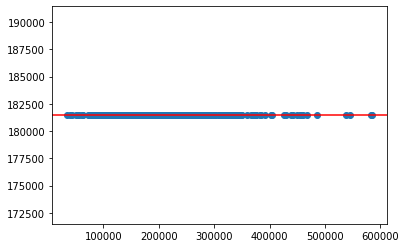

In [21]:
rand_878 = train_df.sample(n = 878)
plt.scatter(rand_878['SalePrice'], test_price)
plt.axhline(n, color = 'red')

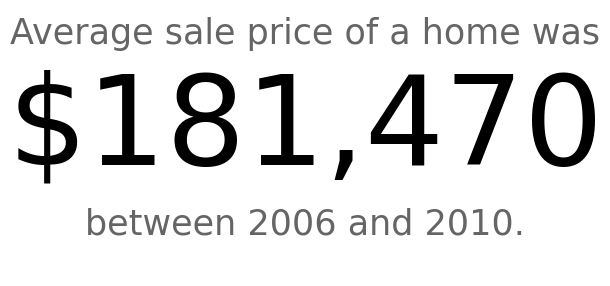

In [27]:
# Set size of figure: eight by five.
plt.figure(figsize=(8, 5))

# Create text:
plt.text(x = 0.5,                              # at horizontal = 0.5
         y = 0.9,                              # at vertical = 0.9
         s = 'Average sale price of a home was', # content of text (string)
         ha = 'center',                        # center-aligned horizontally
         va = 'center',                        # center-aligned vertically
         size = 35,                            # font size = 35
         alpha = 0.6)                          # alpha = 0.6 --> 60% opaque; 40% clear


# Create text:
# at (horizontal = 0.5, vertical = 0.55)
# stating the percent change (s means string)
# center-aligned
# font size 125
# alpha = 1 --> totally opaque

plt.text(x = 0.5,
         y = 0.55,
         s = '$181,470',
         ha = 'center',
         va = 'center',
         size = 125,
         alpha = 1)

# Create text:
# at (horizontal = 0.5, vertical = 0.25)
# stating "between January 1998 and August 2013"
# with a line break in between "1998" and "and"
# center-aligned
# font size 35
# alpha = 0.6 --> 40% clear; 60% opaque
plt.text(x = 0.5,
         y = 0.2,
         s = 'between 2006 and 2010.',
         ha = 'center',
         va = 'center',
         size = 35,
         alpha = 0.6)

# No axes.
plt.axis('off');